# 0.1.0 Building 2-layer maps : combining polygons and scatterplots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import geopandas as gpd 

import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.1.3 Styling a scatterplot

In [4]:
father_son = pd.read_csv(path.data_raw_dir("father_son.csv"), sep=',')
print(father_son.info())
father_son.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fheight  1078 non-null   float64
 1   sheight  1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB
None


,fheight,sheight
0,65.049,59.778
1,63.251,63.214
2,64.955,63.342
3,65.752,62.792
4,61.137,64.281


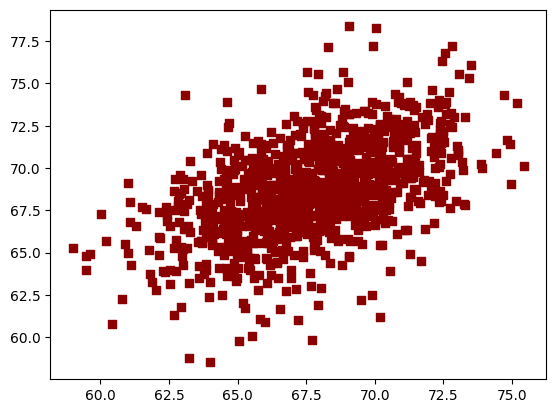

In [5]:
# Scatterplot 1 - father heights vs. son heights with darkred square markers
plt.scatter(father_son.fheight, father_son.sheight, c = 'darkred', marker = 's')

# Show your plot
plt.show()

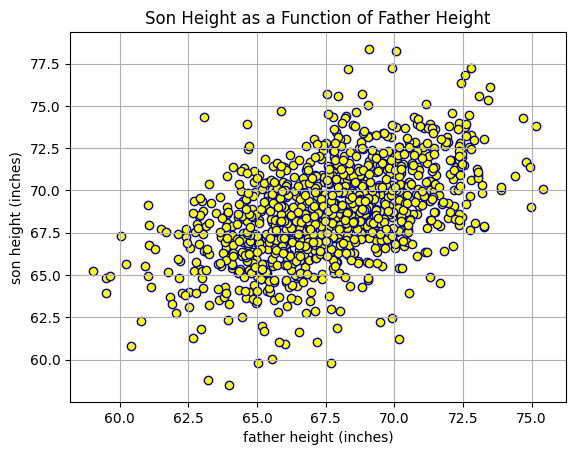

In [6]:
# Scatterplot 3
plt.scatter(father_son.fheight, father_son.sheight,  c = 'yellow', edgecolor = 'darkblue')
plt.grid()
plt.xlabel('father height (inches)')
plt.ylabel('son height (inches)')
plt.title('Son Height as a Function of Father Height')

# Show your plot
plt.show()

In [7]:
fig = px.scatter(father_son, x='fheight', y='sheight')
fig.show()

## 0.1.4 Extracting longitude and latitude

In [16]:
import ast
df_lon = pd.read_csv(path.data_raw_dir("df_lon.csv"), converters={"Location": ast.literal_eval}, sep=',')
print(df_lon.info())
df_lon.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   StopID    4 non-null      int64 
 1   StopName  4 non-null      object
 2   Location  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


,StopID,StopName,Location
0,4431,MUSIC CITY CENTRAL 5TH - BAY 11,"(36.16659, -86.781996)"
1,588,CHARLOTTE AVE & 7TH AVE N WB,"(36.165, -86.78406)"
2,590,CHARLOTTE AVE & 8TH AVE N WB,"(36.164393, -86.785451)"
3,541,11TH AVE / N GULCH STATION OUTBOUND,"(36.162249, -86.790464)"


In [17]:
# extract latitude to a new column: lat
df_lon['lat'] = [loc[0] for loc in df_lon.Location]

# extract longitude to a new column: lng
df_lon['lng'] = [loc[1] for loc in df_lon.Location]

# print the first few rows of df again
df_lon.head()

,StopID,StopName,Location,lat,lng
0,4431,MUSIC CITY CENTRAL 5TH - BAY 11,"(36.16659, -86.781996)",36.166590,-86.781996
1,588,CHARLOTTE AVE & 7TH AVE N WB,"(36.165, -86.78406)",36.165000,-86.784060
2,590,CHARLOTTE AVE & 8TH AVE N WB,"(36.164393, -86.785451)",36.164393,-86.785451
3,541,11TH AVE / N GULCH STATION OUTBOUND,"(36.162249, -86.790464)",36.162249,-86.790464


## 0.1.5 Plotting chicken locations

In [18]:
chickens = pd.read_csv(path.data_external_dir("Domesticated_Hen_Permits_clean_adjusted_lat_lng.csv"), sep=',')
print(chickens.info())
chickens.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   313 non-null    int64  
 1   permit       307 non-null    float64
 2   city         313 non-null    object 
 3   state        313 non-null    object 
 4   zip          313 non-null    int64  
 5   district     310 non-null    float64
 6   date_issued  311 non-null    object 
 7   lat          313 non-null    float64
 8   lng          313 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 22.1+ KB
None


,Unnamed: 0,permit,city,state,zip,district,date_issued,lat,lng
0,0,288.0,Nashville,TN,37211,30.0,11/26/2014,36.029132,-86.724578
1,1,435.0,Nashville,TN,37211,19.0,05/18/2015,36.069132,-86.754578
2,2,270.0,Nashville,TN,37216,7.0,11/20/2014,36.236134,-86.711204
3,3,249.0,Nashville,TN,37216,25.0,12/29/2014,36.246134,-86.751204
4,4,200.0,Nashville,TN,37221,22.0,12/10/2014,36.029367,-86.935290


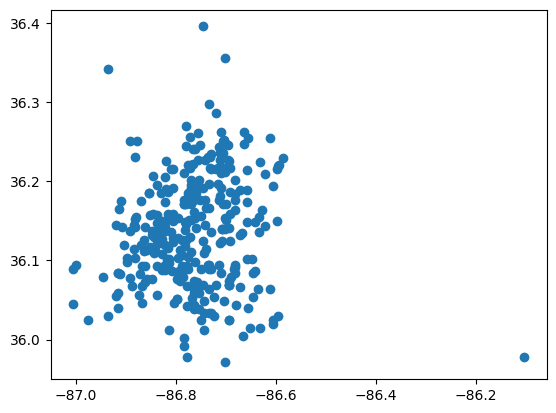

In [20]:
# Plot the locations of all Nashville chicken permits
plt.scatter(x = chickens.lng, y = chickens.lat)

# Show the plot
plt.show()

## 0.1.7 Creating a GeoDataFrame & examining the geometry

In [ ]:
print('ok_')